In [1]:
using DataFrames, CSVFiles, GLM, Statistics, LinearAlgebra
using Plots

### 3.6.3 Multiple Linear Regression

In [2]:
Boston = DataFrame(load("C:\\Users\\charl\\Desktop\\VS_Code\\2024\\ISL_2024\\Datasets\\Boston_Housing.csv", 
spacedelim=true, header_exists=false))
show(first(Boston, 3), allcols=true)

3×14 DataFrame
 Row │ Column1  Column2  Column3  Column4  Column5  Column6  Column7  Column8  Column9  Column10  Column11  Column12  Column13  Column14 
     │ Float64  Float64  Float64  Int64    Float64  Float64  Float64  Float64  Int64    Float64   Float64   Float64   Float64   Float64  
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 0.00632     18.0     2.31        0    0.538    6.575     65.2   4.09          1     296.0      15.3    396.9       4.98      24.0
   2 │ 0.02731      0.0     7.07        0    0.469    6.421     78.9   4.9671        2     242.0      17.8    396.9       9.14      21.6
   3 │ 0.02729      0.0     7.07        0    0.469    7.185     61.1   4.9671        2     242.0      17.8    392.83      4.03      34.7

In [3]:
# Renaming the columns
col_names = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black",
"lstat", "medv"]
rename!(Boston, col_names) 
show(first(Boston, 5), allcols=true)

5×14 DataFrame
 Row │ crim     zn       indus    chas   nox      rm       age      dis      rad    tax      ptratio  black    lstat    medv    
     │ Float64  Float64  Float64  Int64  Float64  Float64  Float64  Float64  Int64  Float64  Float64  Float64  Float64  Float64 
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 0.00632     18.0     2.31      0    0.538    6.575     65.2   4.09        1    296.0     15.3   396.9      4.98     24.0
   2 │ 0.02731      0.0     7.07      0    0.469    6.421     78.9   4.9671      2    242.0     17.8   396.9      9.14     21.6
   3 │ 0.02729      0.0     7.07      0    0.469    7.185     61.1   4.9671      2    242.0     17.8   392.83     4.03     34.7
   4 │ 0.03237      0.0     2.18      0    0.458    6.998     45.8   6.0622      3    222.0     18.7   394.63     2.94     33.4
   5 │ 0.06905      0.0     2.18      0    0.458    7.147     54.2   6.0622      3    

In [4]:
# Creating the dataframe
X = Boston[:, [13,7,14]]

# Building the model
model1 = lm(@formula(medv ~ lstat + age), X)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

medv ~ 1 + lstat + age

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)   Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  33.2228      0.730847    45.46    <1e-99  31.7869     34.6586
lstat        -1.03207     0.0481907  -21.42    <1e-72  -1.12675    -0.937389
age           0.0345443   0.0122255    2.83    0.0049   0.0105251   0.0585636
─────────────────────────────────────────────────────────────────────────────

In [5]:
target = Boston.:medv ;

In [6]:
feat = hcat(ones(size(X)[1]), X[:, [1, 2]])
Array(feat)\target

3-element Vector{Float64}:
 33.22276053179289
 -1.0320685641826006
  0.03454433857164611

In [7]:
terms = select(Boston, Not([:medv])) ;
names(terms)

13-element Vector{String}:
 "crim"
 "zn"
 "indus"
 "chas"
 "nox"
 "rm"
 "age"
 "dis"
 "rad"
 "tax"
 "ptratio"
 "black"
 "lstat"

In [8]:
# Creating the dataframe
Boston = select(Boston, Not([:black]))

# Building the model
model_all = lm(@formula(medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + lstat), Boston)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

medv ~ 1 + crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + lstat

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error       t  Pr(>|t|)    Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)   41.6173      4.93604       8.43    <1e-15   31.919       51.3155
crim          -0.121389    0.0330004    -3.68    0.0003   -0.186227    -0.0565498
zn             0.0469635   0.0138791     3.38    0.0008    0.0196939    0.074233
indus          0.0134677   0.0621447     0.22    0.8285   -0.108633     0.135569
chas           2.83999     0.870007      3.26    0.0012    1.13061      4.54937
nox          -18.758       3.85135      -4.87    <1e-05  -26.3251

In [9]:
# Building the model
model_age = lm(@formula(medv ~ crim + zn + indus + chas + nox + rm + dis + rad + tax + ptratio + lstat), Boston)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

medv ~ 1 + crim + zn + indus + chas + nox + rm + dis + rad + tax + ptratio + lstat

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error       t  Pr(>|t|)    Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)   41.5251     4.91968       8.44    <1e-15   31.859       51.1912
crim          -0.121426   0.0329691    -3.68    0.0003   -0.186203    -0.0566489
zn             0.0465116  0.0137656     3.38    0.0008    0.0194653    0.0735579
indus          0.0134505  0.0620864     0.22    0.8286   -0.108535     0.135436
chas           2.85277    0.867912      3.29    0.0011    1.14752      4.55803
nox          -18.4851     3.71371      -4.98    <1e-06  -25.7817     -11.1884


In [10]:
r2(model_age)

0.7342674984601645

In [11]:
GLM.dispersion(model_age.model)

4.793532256301406

### 3.6.4 Multivariate Goodness of Fit

In [12]:
X_all_2 = select(Boston, Not([:medv, :black]))
vifm = diag(inv(cor(Matrix{Float64}(X_all_2))))
round.(vifm, digits=3)

ArgumentError: ArgumentError: column name :black not found in the data frame

### 3.6.5 Interaction terms

In [13]:
# Creating the dataframe
X_it = Boston[:, [13,7,14]]

# Building the model
model2 = lm(@formula(medv ~ lstat * age), X_it)

BoundsError: BoundsError: attempt to access data frame with 13 columns at index [13, 7, 14]

### 3.6.6 Non-linear Transformations of the Predictors

In [14]:
show(first(Boston), allcols=true)

DataFrameRow
 Row │ crim     zn       indus    chas   nox      rm       age      dis      rad    tax      ptratio  lstat    medv    
     │ Float64  Float64  Float64  Int64  Float64  Float64  Float64  Float64  Int64  Float64  Float64  Float64  Float64 
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 0.00632     18.0     2.31      0    0.538    6.575     65.2     4.09      1    296.0     15.3     4.98     24.0

In [15]:
using CSV

X_poly = CSV.read("X_poly.csv", DataFrame)
X_poly = X_poly[:, 2:end]
insertcols!(X_poly, 5, "medv" => Boston.:medv)
rename!(X_poly, [:intercept, :lstat, :lstat2, :age, :medv]) ;

In [16]:
model3 = lm(@formula(medv ~ lstat + lstat2 + age), X_poly)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

medv ~ 1 + lstat + lstat2 + age

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)    17.7151      0.781055    22.68    <1e-78    16.1806       19.2497
lstat        -179.228       6.73276    -26.62    <1e-97  -192.456      -166.0
lstat2         72.9908      5.48201     13.31    <1e-34    62.2203       83.7613
age             0.0702545   0.0108567    6.47    <1e-09     0.0489242     0.0915847
───────────────────────────────────────────────────────────────────────────────────

In [17]:
using DataFrames

function Anova_lm(y::AbstractVector, yhat_red::AbstractVector, yhat_full::AbstractVector,
    p_red::Union{Int64, Float64}, p_full::Union{Int64, Float64}, model, exp ; o=4)
    
    n = length(y)
    pval = coeftable(model).cols[o][exp+1]
    
    # Error Sum of Squares for the Reduced Model - SSER - (yhat_red_i - ymean)
    SSER = sum([(y[i] - yhat_red[i])^2 for i in 1:length(y)])

    # Error Sum of Squares for the Full Model - SSEF - (yhat_red_i - ymean)
    SSEF = sum([(y[i] - yhat_full[i])^2 for i in 1:length(y)])

    # Degrees of freedom for Reduced Model - dfr
    dfr = n - p_red

    # Degrees of freedom for Full Model - dff
    dff = n - p_full

    # Mean of Squares for Model - MSM
    MSR = SSER/dfr

    # Mean of Squares for the Error - MSE
    MSF = SSEF/dff
    
    # F-Statistics
    F = ((SSER - SSEF)/(dfr - dff))/(SSEF/dff)

    df_r = DataFrame(df_resid = dfr, ssr = SSER, df_diff = 0, ss_diff = NaN, F = NaN, P_val = NaN)
    df_f = DataFrame(df_resid = dff, ssr = SSEF, df_diff = dfr - dff, ss_diff = SSER - SSEF, F = F, P_val = pval)
    df = vcat(df_r, df_f)
    return df
end

Anova_lm (generic function with 1 method)

In [18]:
y_real = Boston.:medv
y_hat1 = predict(model1, X)
y_hat3 = predict(model3, X_poly)
x_values = collect(1:length(y_real)) ;

In [19]:
Anova_lm(y_real, y_hat1, y_hat3, 3, 4, model3, 2)

Row,df_resid,ssr,df_diff,ss_diff,F,P_val
,Int64,Float64,Int64,Float64,Float64,Float64
1,503,19168.1,0,NaN,NaN,NaN
2,502,14165.6,1,5002.52,177.279,7.46849e-35


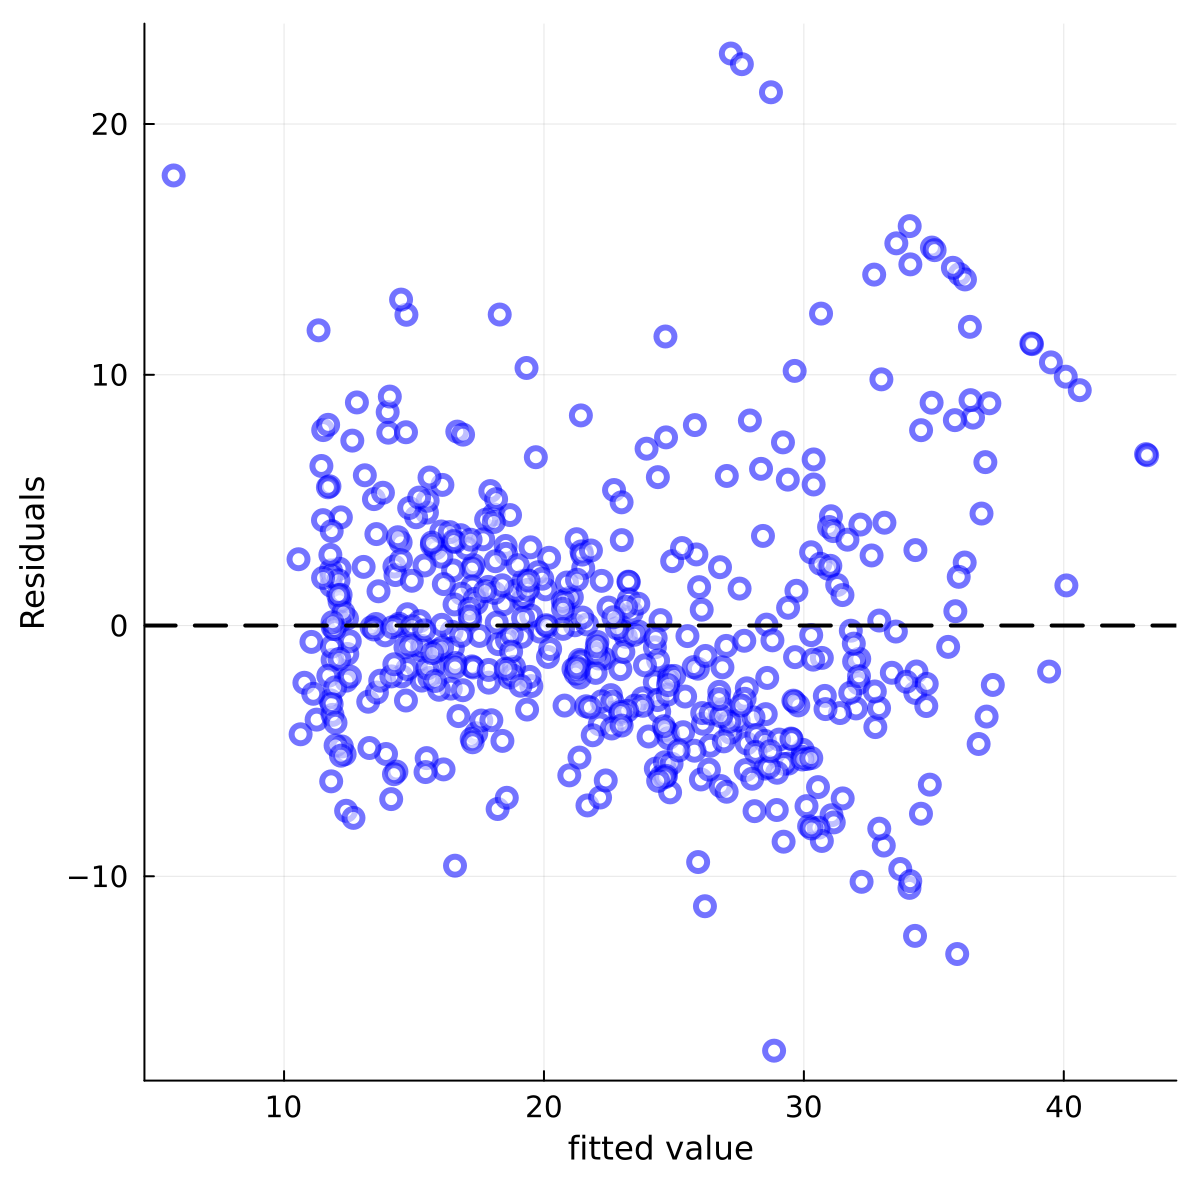

In [20]:
scatter(fitted(model3), residuals(model3), legend=false, c=:white, markersize=5, markerstrokecolor=:blue, 
markerstrokewidth=2.5, alpha=0.55, size=(600, 600), xlabel="fitted value", ylabel="Residuals", dpi=200, 
xtickfont=10, ytickfont=10)
hline!([0], c=:black, linestyle=:dash, linewidth=2)

In [21]:
#savefig("Residuals_model3.png")

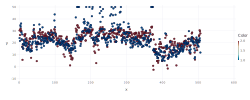

In [22]:
# res = DataFrame(x=x_values, y=y_real, yhat=y_hat)
using Gadfly

set_default_plot_size(25cm, 10cm)
Gadfly.plot(layer(x=x_values, y=y_real, color=[1]),
      layer(x=x_values, y=y_hat1, color=[2]))

### 3.6.7 Qualitative Predictors

In [23]:
Carseats = CSV.read("C:\\Users\\charl\\Desktop\\VS_Code\\2024\\ISL_2024\\Datasets\\Carseats.csv", DataFrame)
first(Carseats, 5)

Row,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,Float64,Int64,Int64,Int64,Int64,Int64,String7,Int64,Int64,String3,String3
1,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.4,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [24]:
names(Carseats)

11-element Vector{String}:
 "Sales"
 "CompPrice"
 "Income"
 "Advertising"
 "Population"
 "Price"
 "ShelveLoc"
 "Age"
 "Education"
 "Urban"
 "US"

In [25]:
model_cars = lm(@formula(Sales ~ CompPrice + Income + Advertising + Population + Price + ShelveLoc + 
Age + Education + Urban + US + Income*Advertising + Price*Age), Carseats)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Sales ~ 1 + CompPrice + Income + Advertising + Population + Price + ShelveLoc + Age + Education + Urban + US + Income & Advertising + Price & Age

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────────
                             Coef.   Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)            6.57557      1.00875        6.52    <1e-09   4.59224       8.55889
CompPrice              0.0929371    0.00411831    22.57    <1e-71   0.08484       0.101034
Income                 0.010894     0.00260444     4.18    <1e-04   0.0057733     0.0160146
Advertising            0.0702462    0.0226091      3.11    0.0020   0.0257938     0.114699
Population    